# Introdução

Esse _notebook_ visa apresentar uma EDA inicial dos [dados do InMet](https://bdmep.inmet.gov.br/).

Os dados baixados foram aqueles relacionados ao texto `pacote de dados anuais de TODAS as estações automáticas separadas por ano`. O elemento disponibilizado é uma pasta compactada que, ao ser descompactada, revela diversos arquivos `.csv`.  

A EDA aqui apresentada se relaciona ao arquivo `csv` de Natal. Ela não é realizada sobre o arquivo original, e sim sobre uma cópia cujos metadados (primeiras linhas) foram removidos. 

# Importações

In [71]:
import missingno as msno
import numpy as np
import pandas as pd
from pathlib import Path

# Carregamento de dados

In [72]:
__file__ = 'eda.ipynb'
script_dir = Path(__file__).parent.absolute()
project_path = Path(__file__).resolve().parents[2]
data_path = str(script_dir.parent / 'data' / 'INMET_NE_RN_A304_NATAL_01-01-2021_A_31-12-2021_NO_METADATA.CSV')

In [73]:
columns_names = ['Data','Hora UTC','PRECIPITACAO TOTAL', 'HORARIO (mm)',
                 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)',
                 'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
                 'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
                 'RADIACAO GLOBAL (Kj/m2)','TEMPERATURA DO AR - BULBO SECO, HORARIA (degC)',
                 'TEMPERATURA DO PONTO DE ORVALHO (degC)',
                 'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (degC)',
                 'TEMPERATURA MINIMA NA HORA ANT. (AUT) (degC)',
                 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (degC)',
                 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (degC)',
                 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
                 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
                 'UMIDADE RELATIVA DO AR, HORARIA (%)',
                 'VENTO, DIRECAO HORARIA (gr) (deg (gr))',
                 'VENTO, RAJADA MAXIMA (m/s)',
                 'VENTO, VELOCIDADE HORARIA (m/s)']
dataset_rn = pd.read_csv(data_path,sep=';', names=columns_names) # provide the column names in order to avoid error
dataset_rn.drop(0, inplace=True) # the first row is a header
dataset_rn.drop(['VENTO, VELOCIDADE HORARIA (m/s)'], axis=1, inplace=True) # remove the column

# Tratando NaN

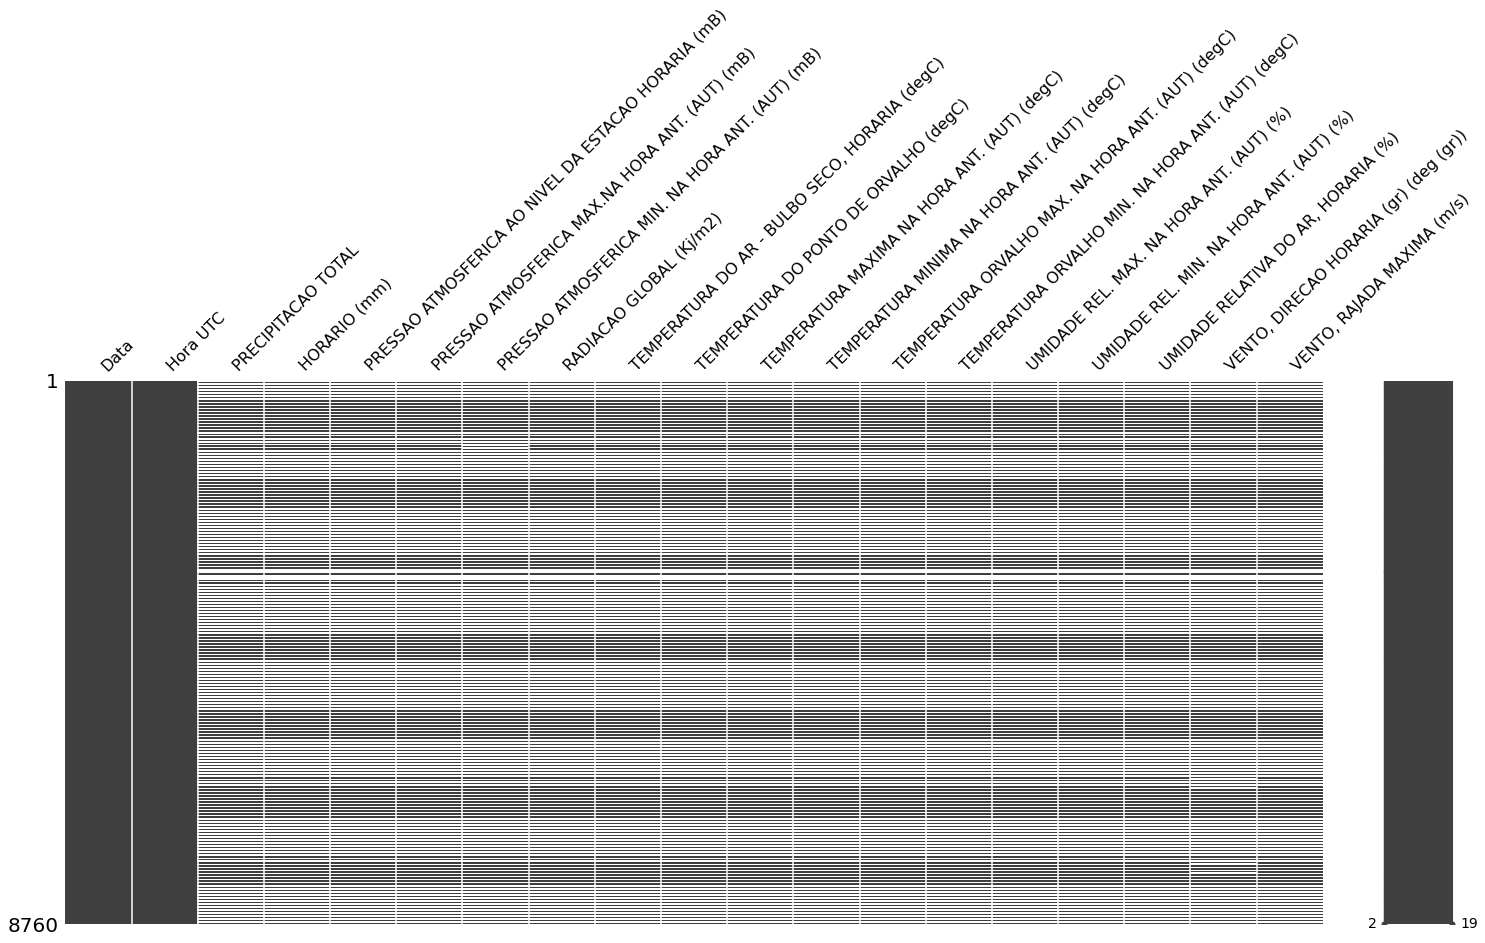

In [74]:
first_msno_analysis = msno.matrix(dataset_rn) # as can be seen, some columns have NaN sometimes. Let's collect them and remove the
# rows with NaN

## Removendo Linhas NaN

In [76]:
columns_with_na = columns_names[2:-1] # columns whose values are NaN
dataset_columns = dataset_rn[columns_with_na] # getting the chunk of the dataset with the columns with NaN
df = dataset_columns.loc[:,:].isna().all(axis=1) # checking if all the columns have NaN
dataset_rn = dataset_rn.loc[~df,:]

<AxesSubplot:>

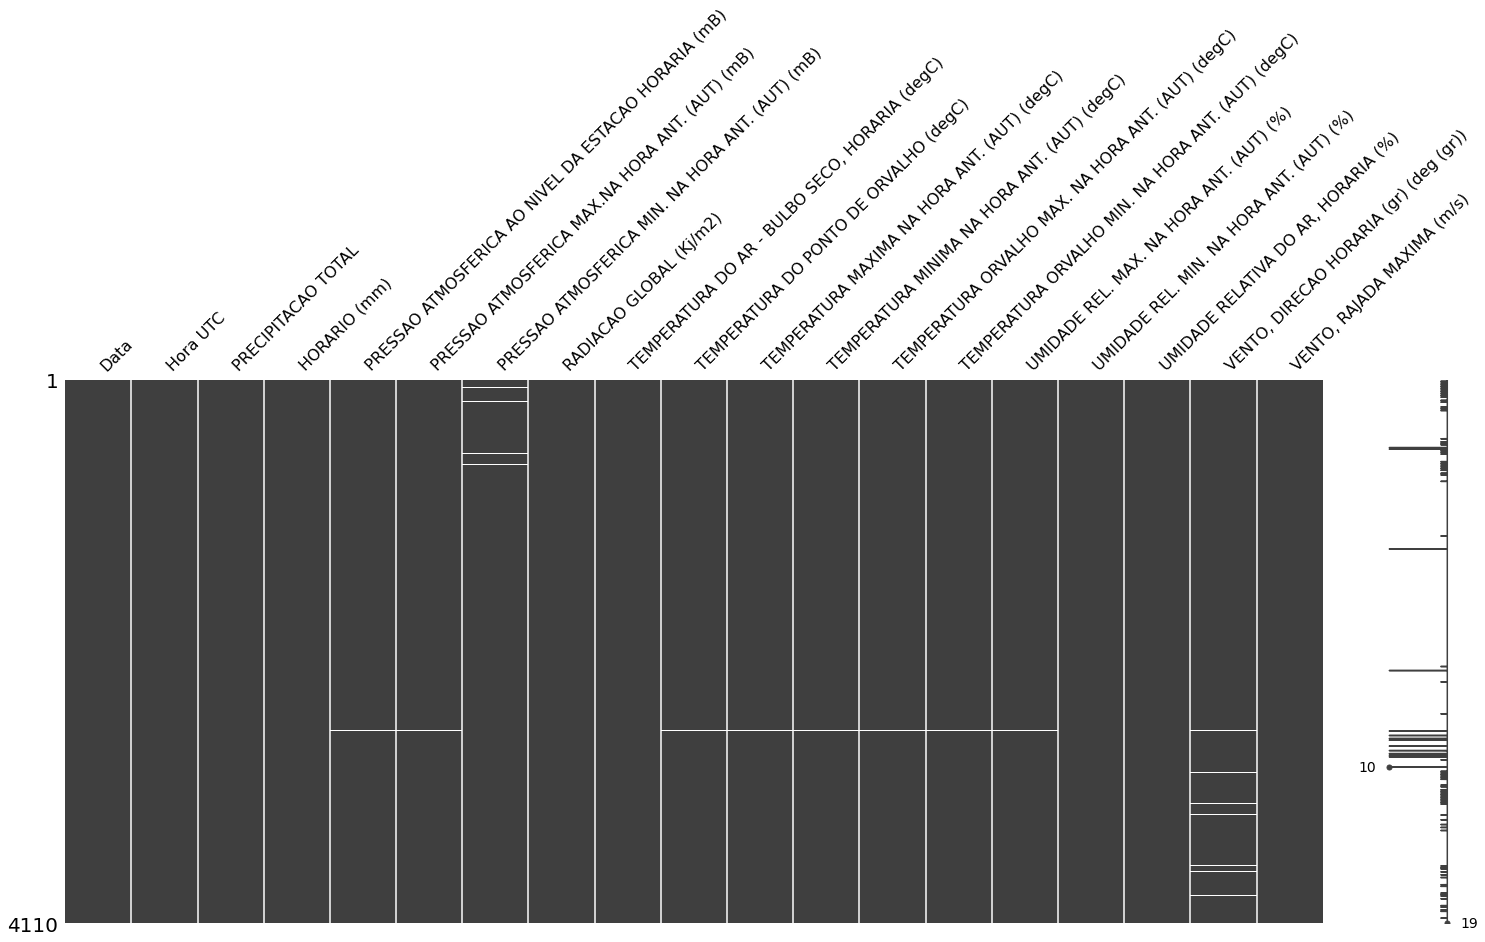

In [77]:
msno.matrix(dataset_rn)

## Removendo linhas que possam conter NaN em algum lugar

In [79]:
dataset_rn.dropna(inplace=True) # remove the rows with NaN

/tmp/ipykernel_38696/2594603427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_rn.dropna(inplace=True) # remove the rows with NaN


<AxesSubplot:>

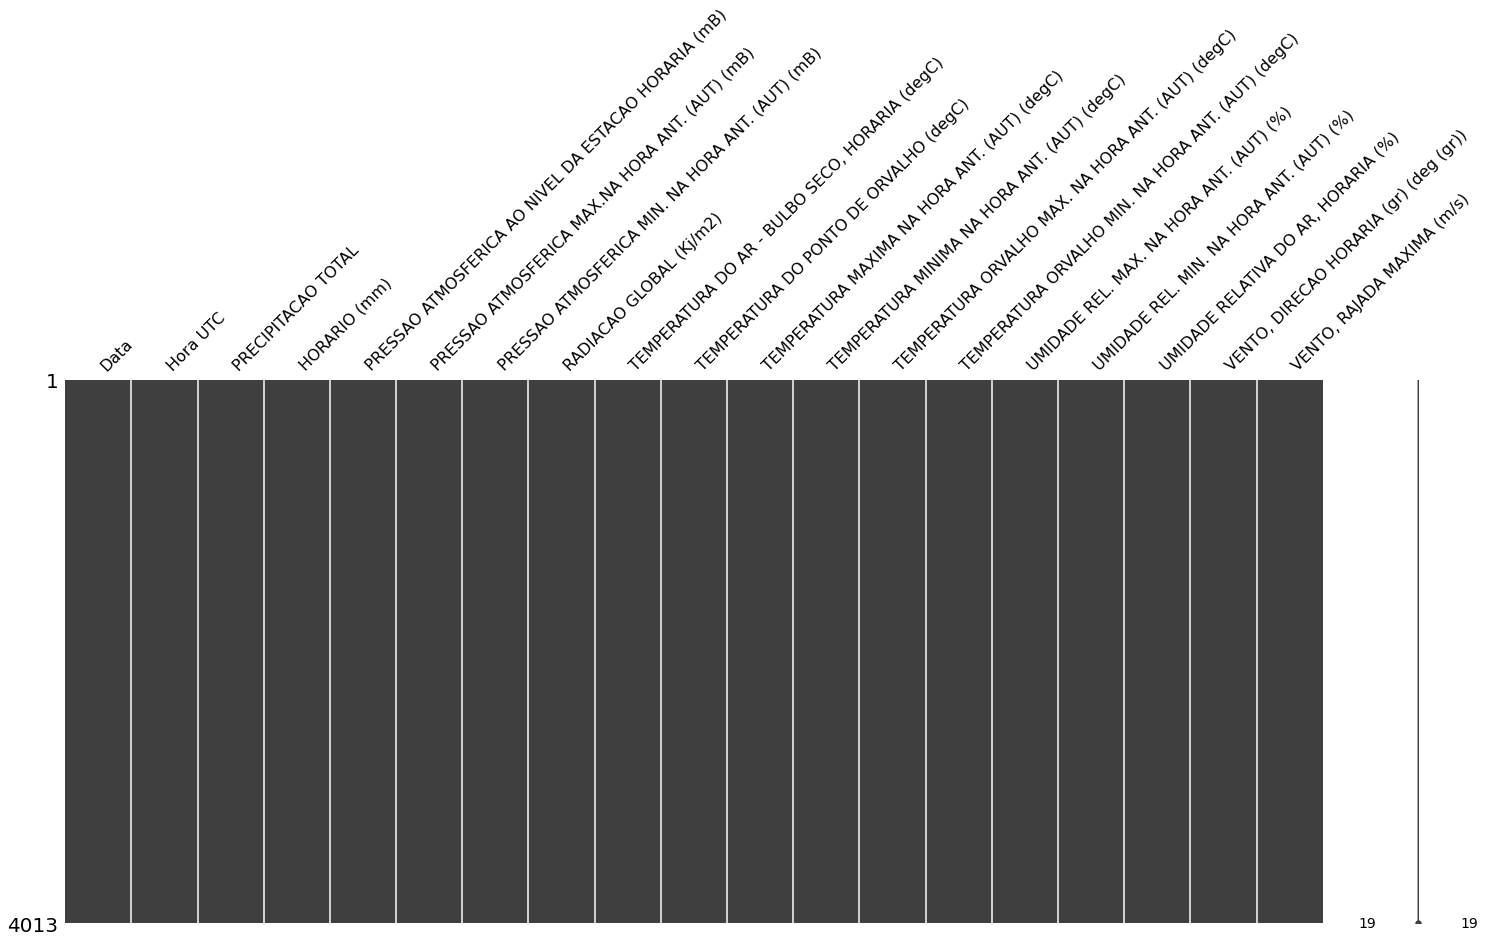

In [81]:
msno.matrix(dataset_rn)

# Descrição do dataset

## _Castind Dtypes_

In [90]:
dtypes_dictionary = {}
for column in dataset_rn.columns:
    if column != 'Data' and column != 'Hora UTC':
        dtypes_dictionary[column] =  'float64'
    else:
        dtypes_dictionary[column] = 'object'

In [92]:
dataset_rn.astype(dtypes_dictionary) # not working yet

ValueError: could not convert string to float: ',2'